# Importing Section

In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Data Collection

In [2]:
#key="93f5e1b69f385b968e79168869023d3f2b7ac184"
#df = pdr.get_data_tiingo('AAPL', api_key=key)
#df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-04-07 00:00:00+00:00,108.54,110.42,108.121,109.95,31801870,25.234110,25.671185,25.136698,25.561917,127207480,0.0,1.0
1,AAPL,2016-04-08 00:00:00+00:00,108.66,109.77,108.170,108.91,23581740,25.262009,25.520069,25.148090,25.320130,94326960,0.0,1.0
2,AAPL,2016-04-11 00:00:00+00:00,109.02,110.61,108.830,108.97,29407518,25.345704,25.715358,25.301531,25.334080,117630072,0.0,1.0
3,AAPL,2016-04-12 00:00:00+00:00,110.44,110.50,108.660,109.34,27232325,25.675835,25.689784,25.262009,25.420100,108929300,0.0,1.0
4,AAPL,2016-04-13 00:00:00+00:00,112.04,112.34,110.800,110.80,33257316,26.047814,26.117560,25.759530,25.759530,133029264,0.0,1.0


In [3]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-03-29 00:00:00+00:00,121.39,122.5800,120.7299,121.65,80819203,121.39,122.5800,120.7299,121.65,80819203,0.0,1.0
1253,AAPL,2021-03-30 00:00:00+00:00,119.90,120.4031,118.8600,120.11,85671919,119.90,120.4031,118.8600,120.11,85671919,0.0,1.0
1254,AAPL,2021-03-31 00:00:00+00:00,122.15,123.5200,121.1500,121.65,118323826,122.15,123.5200,121.1500,121.65,118323826,0.0,1.0
1255,AAPL,2021-04-01 00:00:00+00:00,123.00,124.1800,122.4900,123.66,75089134,123.00,124.1800,122.4900,123.66,75089134,0.0,1.0
1256,AAPL,2021-04-05 00:00:00+00:00,125.90,126.1601,123.0700,123.87,88651175,125.90,126.1601,123.0700,123.87,88651175,0.0,1.0


In [4]:
df1=df['close']

In [5]:
df1

0       108.54
1       108.66
2       109.02
3       110.44
4       112.04
         ...  
1252    121.39
1253    119.90
1254    122.15
1255    123.00
1256    125.90
Name: close, Length: 1257, dtype: float64

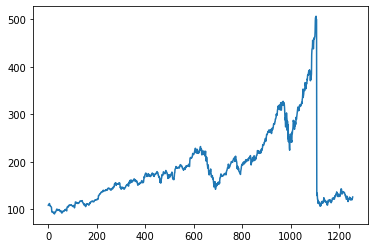

In [6]:
%matplotlib inline
plt.plot(df1)

# Data preprocessing

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1

array([[0.04377631],
       [0.04406494],
       [0.04493085],
       ...,
       [0.07651233],
       [0.07855683],
       [0.08553217]])

In [10]:
X_train, X_test = train_test_split(df1, test_size=0.33, random_state=42)

In [12]:
X_train.shape

(842, 1)

In [14]:
X_test.shape

(415, 1)